In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from scipy import integrate
import time

In [210]:
# system_par
M = 2
K1 = 3
K2 = 2
#K2 = 0
m_ls = np.array([1,1,1,1])
#m_ls = np.array([1,1,1,1])
K_intra = np.array([1.7,1.7,1.7,1.7,1.4,1.4,1.4,1.4,1,1])
#K_intra = np.array([1.5,1.5,1.5,1.5,1.4,1.4,1.4,1.4,1,1])

# driving_par
freq = 0.1
T0 = 1
T1 = 1
R = 1


# initialize
sys_par, dr_par = initialize(M,m_ls,K1,K2,K_intra,freq,T0,T1,R)


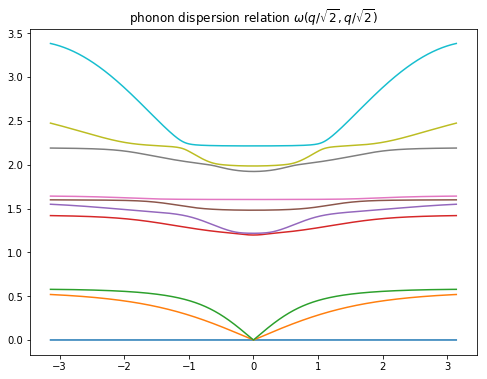

In [200]:
q = np.linspace(-np.pi,np.pi,4000)

eV = []

for qx in q:
    
    f2 = Eig(qx,0,sys_par)[0]
    eV.append(np.sqrt(np.sort(f2)+0.000001))


eV = np.array(eV).transpose()

fig, ax = plt.subplots(figsize = (8,6))

for i in range(10):
    plt.plot(q,eV[i],'-')

plt.title("phonon dispersion relation $\omega(q/\sqrt{2},q/\sqrt{2})$")


#plt.ylim(2.188,2.1895)
#plt.xlim(1.58,1.6)
plt.show()


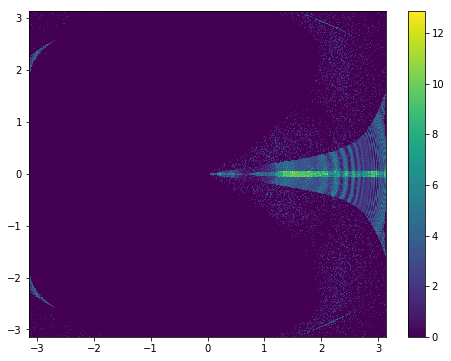

In [211]:
(x,t) = (10,0)
mesh = 500
eV = []

q = np.linspace(-np.pi,np.pi,mesh)






X, Y = np.meshgrid(q,q)

for qx in q:
    for qy in q:
        eV.append(energy_density(x, t, qx, qy, sys_par, dr_par))

Z = np.array(eV).reshape(mesh,mesh).transpose()

fig, ax = plt.subplots(figsize = (8,6))

plt.pcolor(X, Y, Z)
plt.colorbar()
plt.show()


In [194]:
qx,qy = -3.0793828980731637,3
ee, vv = Eig(qx,qy,sys_par)


v = [phonon_v(vv[i],ee[i],qx,qy,sys_par) for i in range(10)]

for vec in v:
    print(vec[0]/np.linalg.norm(vec))

qx,qy = -3.0803828980731637,3
ee, vv = Eig(qx,qy,sys_par)    
    
v = [phonon_v(vv[i],ee[i],qx,qy,sys_par) for i in range(10)]

for vec in v:
    print(vec[0]/np.linalg.norm(vec))
print(np.sqrt(1-0.9952**2))

0.7500401292379928
-0.8487604997897836
-0.7531298429854117
0.4606055975307187
0.9952763832273854
0.6470776024016313
-0.7718231931887897
0.8317669750581832
-0.9928559518754899
0.33731597396948826
0.7503962843655932
-0.8500365187873019
-0.754558312353875
0.4608497090741654
0.9945095441797841
0.6481672375333755
-0.7732168154449837
0.8316785053013416
-0.9918576740882431
0.5523434031251834
0.09786194357358778


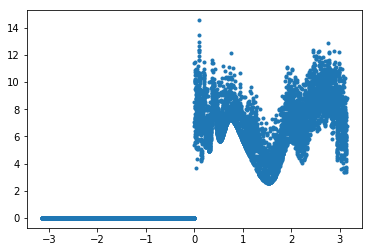

In [212]:
x_ls =  np.linspace(-np.pi,np.pi,10000)
y_ls = [energy_density(5, 0, x, 0, sys_par, dr_par) for x in x_ls]
#for y in y_ls:
#    if y > 1:
#        print (y_ls.index(y))
#print(x_ls[99])
plt.plot(x_ls,y_ls,'.')

In [181]:
def initialize(M, m_ls, K1, K2, K_intra, freq, T0, T1, R):
    M_intra = Matrix_intra(M,m_ls,K_intra)

    return ([M_intra, M, K1, K2, K_intra, m_ls],[freq, T0, T1, R])


def T(t,T0,T1,w0):
    
    return T0+T1*np.cos(w0*t)

#def Int_energy_density(x,t)


def Int_displacement(rx, ry, sys_par, dr_par, epsilon):
    real = []
    imag = []
    for i in range(10):
        
        real.append(2*integrate.dblquad(lambda qx,qy:dx(rx,ry,qx,qy,sys_par,dr_par,epsilon)[i][0], 0, np.pi, lambda qy: -np.pi, lambda qy: np.pi,epsrel = 0.01)[0])
        imag.append(2*integrate.dblquad(lambda qx,qy:dx(rx,ry,qx,qy,sys_par,dr_par,epsilon)[i][1], 0, np.pi, lambda qy: -np.pi, lambda qy: np.pi,epsrel = 0.01)[0])

    return np.array([real,imag])

def Int_velocity(rx, ry, sys_par, dr_par, epsilon):
    real = []
    imag = []
    for i in range(10):
        
        real.append(2*integrate.dblquad(lambda qx,qy:v(rx,ry,qx,qy,sys_par,dr_par,epsilon)[i][0], 0, np.pi, lambda qy: -np.pi, lambda qy: np.pi,epsrel = 0.01)[0])
        imag.append(2*integrate.dblquad(lambda qx,qy:v(rx,ry,qx,qy,sys_par,dr_par,epsilon)[i][1], 0, np.pi, lambda qy: -np.pi, lambda qy: np.pi,epsrel = 0.01)[0])

    return np.array([real,imag])

def energy_density(x, t, qx, qy, sys_par, dr_par):

    w2_ls, eigv_ls = Eig(qx,qy,sys_par)
    
    freq, T0, T1, R = dr_par
    
    velocities = [phonon_v(eigv_ls[i],w2_ls[i],qx,qy,sys_par) for i in range(9)]
    
    res = 0
    

    for v in velocities:
        v_mag = np.linalg.norm(v)
        
        S = v[1]/v_mag
        C = v[0]/v_mag
        
        if (R**2 > (x*S)**2 and C > 0):
            y = x*C-np.sqrt(R**2 - (x*S)**2)
            t_0 = y/v_mag
            
            res += T0+T1*np.cos(freq*(t-t_0))
            
        
    return res
        

def phonon_v(vec,w2,qx,qy,sys_par):
    
    M  = sys_par[1]
    K1 = sys_par[2]
    K2 = sys_par[3]
    
    K1=K1/M
    K2=K2/M
    
    
    diag_x_x  = -2*K1*np.sin(qx)-K2/np.sqrt(2)*(np.sin((qx+qy)/np.sqrt(2))+np.sin((qx-qy)/np.sqrt(2)))
    diag_y_x  = -K2/np.sqrt(2)*(np.sin((qx+qy)/np.sqrt(2))+np.sin((qx-qy)/np.sqrt(2)))
    off_d_x = -K2/np.sqrt(2)*(np.sin((qx+qy)/np.sqrt(2))-np.sin((qx-qy)/np.sqrt(2)))


    
    diag_x_y  = -K2/np.sqrt(2)*(np.sin((qy+qx)/np.sqrt(2))+np.sin((qy-qx)/np.sqrt(2)))
    diag_y_y  = -2*K1*np.sin(qy)-K2/np.sqrt(2)*(np.sin((qy+qx)/np.sqrt(2))+np.sin((qy-qx)/np.sqrt(2)))
    off_d_y = -K2/np.sqrt(2)*(np.sin((qy+qx)/np.sqrt(2))-np.sin((qy-qx)/np.sqrt(2)))


    
    ax = vec[0]*vec[0]*diag_x_x + vec[5]*vec[5]*diag_y_x + 2*(vec[0]*vec[5])*off_d_x  #expectation value of the derivative operator   
    ay = vec[0]*vec[0]*diag_x_y + vec[5]*vec[5]*diag_y_y + 2*(vec[0]*vec[5])*off_d_y  #expectation value of the derivative operator
    vx = -ax/(2*np.sqrt(w2+0.000000001))
    vy = -ay/(2*np.sqrt(w2+0.000000001))
    
    return np.array([vx,vy])


    
def Eig(qx,qy,sys_par):
    M_intra = sys_par[0]
    M_inter = Matrix_inter(qx,qy,sys_par)
    eigVal, eigVec = np.linalg.eigh(M_intra+M_inter)
    return -eigVal, eigVec.transpose()



def rescale_K(M,m,K):
    factors = np.array([np.sqrt(M*m[0]),np.sqrt(M*m[1]),np.sqrt(M*m[2]),np.sqrt(M*m[3]),np.sqrt(m[0]*m[1]),np.sqrt(m[1]*m[2]),np.sqrt(m[2]*m[3]),np.sqrt(m[3]*m[0]),np.sqrt(m[0]*m[2]),np.sqrt(m[1]*m[3])])
    return K/factors


def Matrix_inter(qx,qy,sys_par):
    
    M  = sys_par[1]
    K1 = sys_par[2]
    K2 = sys_par[3]
    
    K1=K1/M
    K2=K2/M
    
    diag_x  = -4*K1*(np.sin(qx/2)**2)-2*K2*(np.sin((qx+qy)/np.sqrt(8))**2+np.sin((qx-qy)/np.sqrt(8))**2)
    diag_y  = -4*K1*(np.sin(qy/2)**2)-2*K2*(np.sin((qx+qy)/np.sqrt(8))**2+np.sin((qx-qy)/np.sqrt(8))**2)
    off_d = -2*K2*(np.sin((qx+qy)/np.sqrt(8))**2-np.sin((qx-qy)/np.sqrt(8))**2)
    
    res = np.zeros([10,10])
    
    res[0][0] = diag_x
    res[5][5] = diag_y
    res[0][5] = off_d
    res[5][0] = off_d
    
    return res
    
    

def Matrix_intra(M,m,K_intra):
    
    K = rescale_K(M,m,K_intra)
    
    res = np.zeros([10,10])
    #spring 1
    res[5][5]-=K[0]
    res[5][6]+=K[0]
    res[6][6]-=K[0]
    res[6][5]+=K[0]
    #spring 2
    res[0][0]-=K[1]
    res[0][2]+=K[1]
    res[2][2]-=K[1]
    res[2][0]+=K[1]
    #spring 3
    res[5][5]-=K[2]
    res[5][8]+=K[2]
    res[8][8]-=K[2]
    res[8][5]+=K[2]
    #spring 4
    res[0][0]-=K[3]
    res[0][4]+=K[3]
    res[4][4]-=K[3]
    res[4][0]+=K[3]
    #spring 5
    res[1][1]-=K[4]/2
    res[1][2]+=K[4]/2
    res[1][6]+=K[4]/2
    res[1][7]-=K[4]/2
    res[6][1]+=K[4]/2
    res[6][2]-=K[4]/2
    res[6][6]-=K[4]/2
    res[6][7]+=K[4]/2

    res[2][2]-=K[4]/2
    res[2][1]+=K[4]/2
    res[2][7]+=K[4]/2
    res[2][6]-=K[4]/2
    res[7][2]+=K[4]/2
    res[7][1]-=K[4]/2
    res[7][7]-=K[4]/2
    res[7][6]+=K[4]/2

    #spring 6
    res[2][2]-=K[5]/2
    res[2][3]+=K[5]/2
    res[2][7]-=K[5]/2
    res[2][8]+=K[5]/2
    res[7][2]-=K[5]/2
    res[7][3]+=K[5]/2
    res[7][7]-=K[5]/2
    res[7][8]+=K[5]/2

    res[3][3]-=K[5]/2
    res[3][2]+=K[5]/2
    res[3][8]-=K[5]/2
    res[3][7]+=K[5]/2
    res[8][3]-=K[5]/2
    res[8][2]+=K[5]/2
    res[8][8]-=K[5]/2
    res[8][7]+=K[5]/2

    #spring 7
    res[3][3]-=K[6]/2
    res[3][4]+=K[6]/2
    res[3][8]+=K[6]/2
    res[3][9]-=K[6]/2
    res[8][3]+=K[6]/2
    res[8][4]-=K[6]/2
    res[8][8]-=K[6]/2
    res[8][9]+=K[6]/2

    res[4][4]-=K[6]/2
    res[4][3]+=K[6]/2
    res[4][9]+=K[6]/2
    res[4][8]-=K[6]/2
    res[9][4]+=K[6]/2
    res[9][3]-=K[6]/2
    res[9][9]-=K[6]/2
    res[9][8]+=K[6]/2
    
    #spring 8
    res[4][4]-=K[7]/2
    res[4][1]+=K[7]/2
    res[4][9]-=K[7]/2
    res[4][6]+=K[7]/2
    res[9][4]-=K[7]/2
    res[9][1]+=K[7]/2
    res[9][9]-=K[7]/2
    res[9][6]+=K[7]/2

    res[1][1]-=K[7]/2
    res[1][4]+=K[7]/2
    res[1][6]-=K[7]/2
    res[1][9]+=K[7]/2
    res[6][1]-=K[7]/2
    res[6][4]+=K[7]/2
    res[6][6]-=K[7]/2
    res[6][9]+=K[7]/2
    
    #spring 9
    res[6][6]-=K[8]
    res[6][8]+=K[8]
    res[8][8]-=K[8]
    res[8][6]+=K[8]
    
    #spring 10
    res[2][2]-=K[9]
    res[2][4]+=K[9]
    res[4][4]-=K[9]
    res[4][2]+=K[9]
    
    return res

